# Fase 1: Exploración y limpieza

## Exploración:

- Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
- Une los dos conjuntos de datos de la forma más eficiente.

## Limpieza:
- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
- Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [1]:
# Importar bibliotecas necesarias para el tratamiento de datos
# ---------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Bibliotecas de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# Cargamos los csv's en dos dataframes
df_actividad = pd.read_csv('../data/Customer Flight Activity.csv', index_col=0)
df_historia = pd.read_csv('../data/Customer Loyalty History.csv', index_col=0)

In [3]:
def exploracion_df(dataframe):
    """
    Realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre duplicados,
    valores nulos, tipos de datos, valores únicos para columnas categóricas y estadísticas descriptivas
    para columnas categóricas y numéricas, agrupadas por la columna de control.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que se va a explorar.
    
    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    
    #Echamos un vistazo
    print("Primeras filas:")
    display(dataframe.head(5))
    print("\n......................\n")

    print("Últimas filas:")
    display(dataframe.tail(5))
    print("\n.....................\n")

    print("Filas aleatorias:")
    display(dataframe.sample(5))
    print("\n.....................\n")

    print(f"El dataframe tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas")
    print("\n.....................\n")    

    print("Tipos de datos y nulos:")
    display(dataframe.info())
    print("\n.....................\n")
    
    print("Características columnas númericas:")
    display(dataframe.describe().T)
    print("\n.....................\n")

    print("Características columnas de texto")
    try:
        display(dataframe.describe(include='O').T)  
    except:
        print("No hay columnas categóricas")
    print("\n.....................\n")

    print("Duplicados:")
    display(dataframe.duplicated().sum())
    print("\n.....................\n")

    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])

    print("\n.....................\n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    try:
        df_categoricas = dataframe.select_dtypes(include = "O")

        for col in df_categoricas.columns:
            print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
            display(pd.DataFrame(dataframe[col].value_counts()/dataframe[col].shape[0])*100) 
    except:
        print("No hay columnas categóricas")
    print("\n.....................\n")  

In [4]:
#Exploramos el dataframe con la actividad de los clientes
exploracion_df(df_actividad)

Primeras filas:


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.0,0,0
100102,2017,1,10,4,14,2030,203.0,0,0
100140,2017,1,6,0,6,1200,120.0,0,0
100214,2017,1,0,0,0,0,0.0,0,0
100272,2017,1,0,0,0,0,0.0,0,0



......................

Últimas filas:


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
999902,2018,12,0,0,0,0,0.0,0,0
999911,2018,12,0,0,0,0,0.0,0,0
999940,2018,12,3,0,3,1233,123.0,0,0
999982,2018,12,0,0,0,0,0.0,0,0
999986,2018,12,0,0,0,0,0.0,0,0



.....................

Filas aleatorias:


,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
242028,2018,12,6,0,6,2010,201.0,0,0
521653,2017,7,8,0,8,2888,288.0,0,0
815207,2017,5,9,6,15,1035,103.0,0,0
144695,2017,8,0,0,0,0,0.0,0,0
225279,2017,10,10,0,10,3530,353.0,0,0



.....................

El dataframe tiene 405624 filas y 9 columnas

.....................

Tipos de datos y nulos:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB


None


.....................

Características columnas númericas:


,count,mean,std,min,25%,50%,75%,max
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0



.....................

Características columnas de texto
No hay columnas categóricas

.....................

Duplicados:


228705


.....................

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



.....................

Los valores que tenemos para las columnas categóricas son: 

.....................



In [5]:
# Eliminamos los duplicados
df_actividad = df_actividad.drop_duplicates()

In [6]:
#Exploramos el dataframe con la historia de los clientes
exploracion_df(df_historia)

Primeras filas:


,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN



......................

Últimas filas:


,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0



.....................

Filas aleatorias:


,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
230763,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,86759.0,Single,Star,5507.16,Standard,2016,3,NaN,NaN
736646,Canada,British Columbia,Vancouver,V6E 3D9,Female,Bachelor,64680.0,Married,Aurora,7285.03,Standard,2016,2,NaN,NaN
352078,Canada,British Columbia,Vancouver,V6E 3Z3,Female,Bachelor,72879.0,Married,Star,5412.46,Standard,2012,10,NaN,NaN
919338,Canada,Quebec,Montreal,H2T 9K8,Male,Bachelor,62225.0,Married,Aurora,14510.44,Standard,2017,8,NaN,NaN
991983,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,54286.0,Married,Nova,8072.75,Standard,2016,6,2017.0,3.0



.....................

El dataframe tiene 16737 filas y 15 columnas

.....................

Tipos de datos y nulos:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non

None


.....................

Características columnas númericas:


,count,mean,std,min,25%,50%,75%,max
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00



.....................

Características columnas de texto


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766



.....................

Duplicados:


0


.....................

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117



.....................

Los valores que tenemos para las columnas categóricas son: 
La columna COUNTRY tiene las siguientes valore únicos:


,Country
Canada,100.0


La columna PROVINCE tiene las siguientes valore únicos:


,Province
Ontario,32.287746
British Columbia,26.342833
Quebec,19.716795
Alberta,5.789568
Manitoba,3.931409
New Brunswick,3.799964
Nova Scotia,3.094939
Saskatchewan,2.443688
Newfoundland,1.541495
Yukon,0.657227


La columna CITY tiene las siguientes valore únicos:


,City
Toronto,20.021509
Vancouver,15.426898
Montreal,12.302085
Winnipeg,3.931409
Whistler,3.477326
Halifax,3.094939
Ottawa,3.041166
Trenton,2.903746
Edmonton,2.903746
Quebec City,2.897771


La columna POSTAL CODE tiene las siguientes valore únicos:


,Postal Code
V6E 3D9,5.443030
V5R 1W3,4.086754
V6T 1Y8,3.477326
V6E 3Z3,3.250284
M2M 7K8,3.190536
P1J 8T7,2.987393
H2T 9K8,2.981418
K8V 4B2,2.903746
G1B 3L5,2.897771
H2T 2J6,2.664755


La columna GENDER tiene las siguientes valore únicos:


,Gender
Female,50.247954
Male,49.752046


La columna EDUCATION tiene las siguientes valore únicos:


,Education
Bachelor,62.585888
College,25.321145
High School or Below,4.672283
Doctor,4.385493
Master,3.035191


La columna MARITAL STATUS tiene las siguientes valore únicos:


,Marital Status
Married,58.164546
Single,26.790942
Divorced,15.044512


La columna LOYALTY CARD tiene las siguientes valore únicos:


,Loyalty Card
Star,45.629444
Nova,33.883014
Aurora,20.487543


La columna ENROLLMENT TYPE tiene las siguientes valore únicos:


,Enrollment Type
Standard,94.198482
2018 Promotion,5.801518



.....................



In [7]:
# Reseteamos los índices para tener como columnas los números de las tarjetas de fidelidad
df_actividad = df_actividad.reset_index()
df_historia = df_historia.reset_index()

In [8]:
display(df_actividad[df_actividad['Loyalty Number'].duplicated(keep=False)].sort_values('Loyalty Number'))

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
86586,100018,2017,3,14,3,17,2533,253.0,438,36
106134,100018,2018,3,7,0,7,1876,280.5,0,0
82023,100018,2018,1,1,0,1,312,31.0,0,0
128282,100018,2018,7,9,7,16,2736,273.0,0,0
...,...,...,...,...,...,...,...,...,...,...
53659,999986,2017,8,12,0,12,1716,171.0,0,0
115508,999986,2017,4,5,4,9,1845,184.0,527,43
60674,999986,2017,9,9,0,9,2781,278.0,0,0
6221,999986,2017,1,1,0,1,1849,184.0,0,0


In [9]:
df_historia.shape

(16737, 16)

In [10]:
len(df_actividad['Loyalty Number'].unique())

15153

In [11]:
# unimos manteniendo el df de actividad para quedarnos con 
df = df_actividad.merge(df_historia, how='left', on='Loyalty Number')

In [12]:
exploracion_df(df)

Primeras filas:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100428,2017,1,6,0,6,606,60.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,63478.0,Married,Aurora,5845.43,Standard,2012,8,NaN,NaN



......................

Últimas filas:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
176914,999524,2018,12,11,4,15,1500,150.0,0,0,Canada,Quebec,Montreal,H2T 2J6,Male,College,NaN,Married,Aurora,14325.15,Standard,2015,5,NaN,NaN
176915,999550,2018,12,15,0,15,2985,298.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,Doctor,125167.0,Divorced,Star,13736.13,Standard,2014,8,NaN,NaN
176916,999631,2018,12,11,1,12,2244,224.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,47349.0,Divorced,Star,2572.51,Standard,2014,1,NaN,NaN
176917,999758,2018,12,1,0,1,896,89.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,NaN,Single,Star,18690.34,Standard,2018,8,NaN,NaN
176918,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN



.....................

Filas aleatorias:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
3350,543460,2017,1,3,3,6,2754,275.0,0,0,Canada,Quebec,Tremblant,H5Y 2S9,Male,College,NaN,Married,Star,5504.14,Standard,2013,2,NaN,NaN
128451,116332,2018,7,13,2,15,2700,270.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,62706.0,Married,Aurora,9386.75,Standard,2012,6,NaN,NaN
105599,283929,2018,3,1,0,1,1455,217.5,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,80816.0,Single,Aurora,5989.77,Standard,2013,9,NaN,NaN
1075,231755,2017,1,5,0,5,3030,303.0,0,0,Canada,British Columbia,Whistler,V6T 1Y8,Female,College,NaN,Married,Nova,9048.98,Standard,2014,2,NaN,NaN
158485,744567,2018,10,10,0,10,1070,107.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,87289.0,Married,Nova,2927.07,Standard,2016,7,NaN,NaN



.....................

El dataframe tiene 176919 filas y 25 columnas

.....................

Tipos de datos y nulos:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 176919 entries, 0 to 176918
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               176919 non-null  int64  
 1   Year                         176919 non-null  int64  
 2   Month                        176919 non-null  int64  
 3   Flights Booked               176919 non-null  int64  
 4   Flights with Companions      176919 non-null  int64  
 5   Total Flights                176919 non-null  int64  
 6   Distance                     176919 non-null  int64  
 7   Points Accumulated           176919 non-null  float64
 8   Points Redeemed              176919 non-null  int64  
 9   Dollar Cost Points Redeemed  176919 non-null  int64  
 10  Country                      176919 non-null  object 
 11 

None


.....................

Características columnas númericas:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,176919.0,527733.530197,258269.204880,100018.00,302414.00,516544.00,746536.00,999986.00
Year,176919.0,2017.535364,0.498749,2017.00,2017.00,2018.00,2018.00,2018.00
Month,176919.0,6.621482,3.426053,1.00,4.00,7.00,10.00,12.00
Flights Booked,176919.0,7.867352,4.698770,0.00,4.00,7.00,11.00,21.00
Flights with Companions,176919.0,2.202443,2.580491,0.00,0.00,1.00,4.00,11.00
Total Flights,176919.0,10.069795,5.982277,0.00,5.00,10.00,14.00,32.00
Distance,176919.0,2373.745901,1143.542507,0.00,1466.50,2310.00,3168.00,6293.00
Points Accumulated,176919.0,243.252618,117.033508,0.00,150.00,237.00,325.00,676.50
Points Redeemed,176919.0,70.136062,182.280275,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,176919.0,5.676564,14.743061,0.00,0.00,0.00,0.00,71.00



.....................

Características columnas de texto


,count,unique,top,freq
Country,176919,1,Canada,176919
Province,176919,11,Ontario,57303
City,176919,29,Toronto,35846
Postal Code,176919,55,V6E 3D9,9436
Gender,176919,2,Male,88544
Education,176919,5,Bachelor,110177
Marital Status,176919,3,Married,102929
Loyalty Card,176919,3,Star,80428
Enrollment Type,176919,2,Standard,169116



.....................

Duplicados:


0


.....................

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.495283
Cancellation Year,96.427179
Cancellation Month,96.427179



.....................

Los valores que tenemos para las columnas categóricas son: 
La columna COUNTRY tiene las siguientes valore únicos:


,Country
Canada,100.0


La columna PROVINCE tiene las siguientes valore únicos:


,Province
Ontario,32.389399
British Columbia,26.490089
Quebec,19.513450
Alberta,5.752915
New Brunswick,3.899525
Manitoba,3.835654
Nova Scotia,3.124029
Saskatchewan,2.427099
Newfoundland,1.504078
Yukon,0.703712


La columna CITY tiene las siguientes valore únicos:


,City
Toronto,20.261249
Vancouver,15.385572
Montreal,12.174498
Winnipeg,3.835654
Whistler,3.467123
Ottawa,3.127985
Halifax,3.124029
Edmonton,2.955025
Quebec City,2.836326
Trenton,2.821630


La columna POSTAL CODE tiene las siguientes valore únicos:


,Postal Code
V6E 3D9,5.333514
V5R 1W3,4.055528
V6T 1Y8,3.467123
V6E 3Z3,3.250075
M2M 7K8,3.198639
P1J 8T7,3.069201
H2T 9K8,2.930720
G1B 3L5,2.836326
K8V 4B2,2.821630
V1E 4R6,2.746455


La columna GENDER tiene las siguientes valore únicos:


,Gender
Male,50.047762
Female,49.952238


La columna EDUCATION tiene las siguientes valore únicos:


,Education
Bachelor,62.275392
College,25.495283
High School or Below,4.715152
Doctor,4.394666
Master,3.119507


La columna MARITAL STATUS tiene las siguientes valore únicos:


,Marital Status
Married,58.178602
Single,26.888011
Divorced,14.933388


La columna LOYALTY CARD tiene las siguientes valore únicos:


,Loyalty Card
Star,45.460352
Nova,33.790040
Aurora,20.749609


La columna ENROLLMENT TYPE tiene las siguientes valore únicos:


,Enrollment Type
Standard,95.589507
2018 Promotion,4.410493



.....................



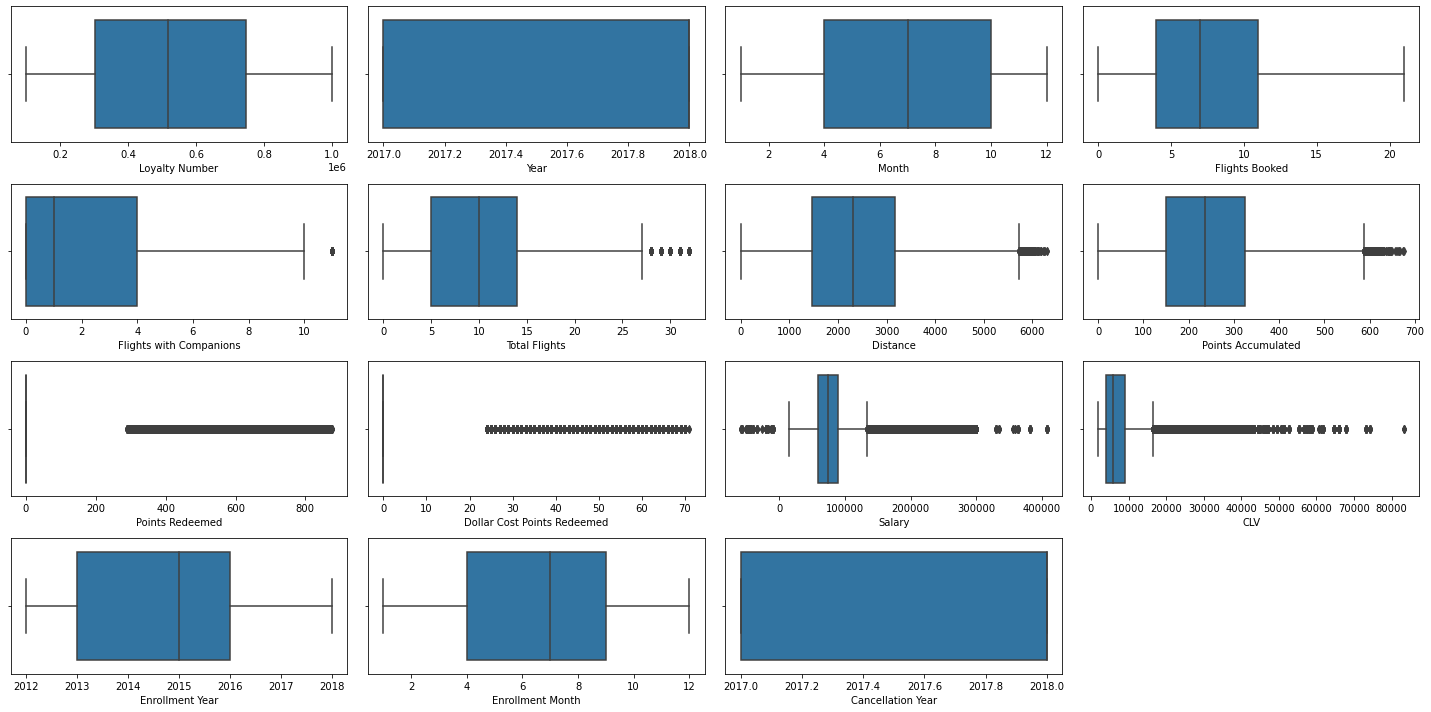

In [13]:
col_num = df.select_dtypes(exclude='object').columns
# Se hacen boxplots de los datos numéricos para ver distribución y datos atípicos
fig, axes = plt.subplots(nrows = 4, ncols = 4, figsize = (20,10)) 

 #aplanar los indices (solo un indice)
axes = axes.flat

for indice, col in enumerate(col_num):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

## Limpieza

### Cambios a los nombres de las columnas
Pasamos los nombre de las columnas a minúsculas y con barras bajas en vez de espacios

In [14]:
def columnas_minusculas(dataframe):
    """
    Función para cambiar los nombres de las columnas de un dataframe a minúsculas, eliminar posibles espacios antes y después de los nombres y cambiar los espacios internos a barra baja
    
    Args:
        dataframe (DataFrame): dataframe 

    Returns:
        dataframe (DataFrame): Devuelve el mismo dataframe pero con el nombre de las columnas en minúsculas y los espacios como barras bajas
    """
    nuevas_columnas = {columna: columna.lower().strip().replace(" ", "_") for columna in dataframe.columns}
    dataframe.rename(columns=nuevas_columnas, inplace= True)

    return dataframe

In [15]:
df = columnas_minusculas(df)
df.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

### Gestión de nulos

- **Año y mes de cancelación**.
Se entiende que los nulos en esta columna significan tarjetas de fidelidad que siguen activas y por lo tanto no se han cancelado, así que aportan información importante y no los vamos a modificar (más adelante, en caso de necesitar trabajar con esta columna ya estudiariamos que hacer, por ejemplo, una columna tipo texto con 'cancelada' o 'activa', dependiendo de los cálculos que se necesitaran).

- **Salario**.
En la columna salario hay números negativos que no tienen sentido, así que antes de gestionar los nulos, se ha de decidir que hacer con los negativos.
Tres opciones:
    - Pasarlos a positivos
    - Convertirlos en nulos
    - Eliminar las filas con los nulos.

In [16]:
# Creamos 
salario_negativo = df[df['salary'] <= 0]
salario_positivo = df[df['salary'] > 0]

In [17]:
exploracion_df(salario_positivo)

Primeras filas:


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100428,2017,1,6,0,6,606,60.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,63478.0,Married,Aurora,5845.43,Standard,2012,8,NaN,NaN
5,100550,2017,1,3,0,3,2037,203.0,0,0,Canada,Quebec,Montreal,H2Y 4R4,Female,Bachelor,54133.0,Married,Nova,7861.80,Standard,2013,2,NaN,NaN
6,863070,2017,9,8,7,15,4245,424.0,341,28,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,89340.0,Divorced,Nova,32871.75,Standard,2013,2,NaN,NaN



......................

Últimas filas:


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
176912,999272,2018,12,12,8,20,3460,346.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Female,Bachelor,84988.0,Married,Star,10656.88,Standard,2013,8,NaN,NaN
176913,999498,2018,12,17,0,17,2754,275.0,0,0,Canada,Quebec,Montreal,H4G 3T4,Male,Bachelor,54457.0,Divorced,Nova,3436.13,Standard,2017,2,NaN,NaN
176915,999550,2018,12,15,0,15,2985,298.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,Doctor,125167.0,Divorced,Star,13736.13,Standard,2014,8,NaN,NaN
176916,999631,2018,12,11,1,12,2244,224.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,47349.0,Divorced,Star,2572.51,Standard,2014,1,NaN,NaN
176918,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN



.....................

Filas aleatorias:


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
132562,790287,2018,3,11,3,14,3430,370.44,645,52,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,87662.0,Single,Star,4770.98,Standard,2017,10,2018.0,6.0
132969,586711,2018,7,8,0,8,1224,122.00,0,0,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,57855.0,Married,Nova,3732.35,Standard,2013,4,NaN,NaN
139979,459948,2018,8,4,0,4,2540,254.00,0,0,Canada,Nova Scotia,Halifax,B3C 2M8,Female,Bachelor,82211.0,Married,Nova,3238.93,Standard,2017,6,NaN,NaN
26108,153146,2017,5,13,0,13,1612,161.00,0,0,Canada,Alberta,Calgary,T3E 2V9,Male,Bachelor,50663.0,Married,Nova,4929.55,Standard,2015,7,NaN,NaN
87882,577872,2017,12,6,5,11,3762,376.00,0,0,Canada,Alberta,Banff,T4V 1D4,Female,Bachelor,57063.0,Married,Nova,4118.54,Standard,2016,2,2018.0,1.0



.....................

El dataframe tiene 131633 filas y 25 columnas

.....................

Tipos de datos y nulos:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 131633 entries, 0 to 176918
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loyalty_number               131633 non-null  int64  
 1   year                         131633 non-null  int64  
 2   month                        131633 non-null  int64  
 3   flights_booked               131633 non-null  int64  
 4   flights_with_companions      131633 non-null  int64  
 5   total_flights                131633 non-null  int64  
 6   distance                     131633 non-null  int64  
 7   points_accumulated           131633 non-null  float64
 8   points_redeemed              131633 non-null  int64  
 9   dollar_cost_points_redeemed  131633 non-null  int64  
 10  country                      131633 non-null  object 
 11 

None


.....................

Características columnas númericas:


,count,mean,std,min,25%,50%,75%,max
loyalty_number,131633.0,528044.624365,259896.305143,100018.00,301301.0,518061.00,749705.00,999986.00
year,131633.0,2017.535815,0.498717,2017.00,2017.0,2018.00,2018.00,2018.00
month,131633.0,6.621584,3.426391,1.00,4.0,7.00,10.00,12.00
flights_booked,131633.0,7.851033,4.699412,0.00,4.0,7.00,11.00,21.00
flights_with_companions,131633.0,2.197564,2.576648,0.00,0.0,1.00,4.00,11.00
total_flights,131633.0,10.048597,5.982452,0.00,5.0,10.00,14.00,32.00
distance,131633.0,2373.243366,1145.037594,0.00,1464.0,2310.00,3168.00,6293.00
points_accumulated,131633.0,243.292046,117.227610,0.00,150.0,237.00,325.08,676.50
points_redeemed,131633.0,69.863378,181.907021,0.00,0.0,0.00,0.00,876.00
dollar_cost_points_redeemed,131633.0,5.654448,14.712788,0.00,0.0,0.00,0.00,71.00



.....................

Características columnas de texto


,count,unique,top,freq
country,131633,1,Canada,131633
province,131633,11,Ontario,42650
city,131633,29,Toronto,26765
postal_code,131633,55,V6E 3D9,6978
gender,131633,2,Female,66241
education,131633,4,Bachelor,110003
marital_status,131633,3,Married,87852
loyalty_card,131633,3,Star,58222
enrollment_type,131633,2,Standard,125874



.....................

Duplicados:


0


.....................

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
cancellation_year,96.508474
cancellation_month,96.508474



.....................

Los valores que tenemos para las columnas categóricas son: 
La columna COUNTRY tiene las siguientes valore únicos:


,country
Canada,100.0


La columna PROVINCE tiene las siguientes valore únicos:


,province
Ontario,32.400690
British Columbia,26.282923
Quebec,19.629576
Alberta,5.709814
New Brunswick,4.037741
Manitoba,3.805277
Nova Scotia,3.295526
Saskatchewan,2.377064
Newfoundland,1.439609
Yukon,0.648773


La columna CITY tiene las siguientes valore únicos:


,city
Toronto,20.333047
Vancouver,15.218828
Montreal,12.024340
Winnipeg,3.805277
Whistler,3.366177
Halifax,3.295526
Ottawa,3.162581
Quebec City,3.035713
Edmonton,2.912643
Dawson Creek,2.775140


La columna POSTAL_CODE tiene las siguientes valore únicos:


,postal_code
V6E 3D9,5.301102
V5R 1W3,3.992920
V6T 1Y8,3.366177
M2M 7K8,3.251464
V6E 3Z3,3.202085
P1J 8T7,3.088891
G1B 3L5,3.035713
H2T 9K8,2.793372
K8V 4B2,2.775140
U5I 4F1,2.775140


La columna GENDER tiene las siguientes valore únicos:


,gender
Female,50.322488
Male,49.677512


La columna EDUCATION tiene las siguientes valore únicos:


,education
Bachelor,83.567950
High School or Below,6.332759
Doctor,5.906574
Master,4.192718


La columna MARITAL_STATUS tiene las siguientes valore únicos:


,marital_status
Married,66.740103
Divorced,17.023087
Single,16.236810


La columna LOYALTY_CARD tiene las siguientes valore únicos:


,loyalty_card
Star,44.23055
Nova,34.42146
Aurora,21.34799


La columna ENROLLMENT_TYPE tiene las siguientes valore únicos:


,enrollment_type
Standard,95.624957
2018 Promotion,4.375043



.....................



In [18]:
exploracion_df(salario_negativo)

Primeras filas:


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
939,212128,2017,1,3,0,3,1959,195.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,-49001.0,Married,Nova,3130.68,2018 Promotion,2018,2,NaN,NaN
1134,239955,2017,1,9,2,11,2079,207.0,0,0,Canada,Quebec,Hull,J8Y 3Z5,Female,Bachelor,-47310.0,Married,Nova,6366.23,2018 Promotion,2018,3,NaN,NaN
4644,734647,2017,1,3,1,4,860,86.0,0,0,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,-46303.0,Married,Nova,11280.73,2018 Promotion,2018,4,NaN,NaN
5004,790475,2017,1,2,2,4,1292,129.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,-34079.0,Married,Nova,12913.50,2018 Promotion,2018,2,NaN,NaN
5692,906428,2017,1,11,6,17,1666,166.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN



......................

Últimas filas:


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
174647,734647,2018,12,15,0,15,1440,144.0,0,0,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,-46303.0,Married,Nova,11280.73,2018 Promotion,2018,4,NaN,NaN
175146,790475,2018,12,7,1,8,1056,105.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,-34079.0,Married,Nova,12913.50,2018 Promotion,2018,2,NaN,NaN
176139,906428,2018,12,13,0,13,2912,291.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
176361,430398,2018,12,5,5,10,660,66.0,539,44,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN
176598,959977,2018,12,14,6,20,4280,428.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN



.....................

Filas aleatorias:


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
129400,212128,2018,7,8,0,8,2504,250.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,-49001.0,Married,Nova,3130.68,2018 Promotion,2018,2,NaN,NaN
176598,959977,2018,12,14,6,20,4280,428.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,NaN,NaN
40412,212128,2017,7,2,2,4,664,66.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,-49001.0,Married,Nova,3130.68,2018 Promotion,2018,2,NaN,NaN
62961,366599,2017,10,8,0,8,1096,109.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Female,Bachelor,-9081.0,Married,Star,6915.73,2018 Promotion,2018,4,NaN,NaN
75767,232755,2017,12,10,0,10,900,90.0,0,0,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN



.....................

El dataframe tiene 180 filas y 25 columnas

.....................

Tipos de datos y nulos:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 939 to 176598
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loyalty_number               180 non-null    int64  
 1   year                         180 non-null    int64  
 2   month                        180 non-null    int64  
 3   flights_booked               180 non-null    int64  
 4   flights_with_companions      180 non-null    int64  
 5   total_flights                180 non-null    int64  
 6   distance                     180 non-null    int64  
 7   points_accumulated           180 non-null    float64
 8   points_redeemed              180 non-null    int64  
 9   dollar_cost_points_redeemed  180 non-null    int64  
 10  country                      180 non-null    object 
 11  province        

None


.....................

Características columnas númericas:


,count,mean,std,min,25%,50%,75%,max
loyalty_number,180.0,473724.066667,240820.972888,115505.00,239955.00,430398.00,729561.00,959977.0
year,180.0,2017.638889,0.481662,2017.00,2017.00,2018.00,2018.00,2018.0
month,180.0,6.850000,3.253661,1.00,4.00,7.00,9.25,12.0
flights_booked,180.0,8.533333,5.064280,1.00,4.00,8.00,12.00,21.0
flights_with_companions,180.0,2.016667,2.747218,0.00,0.00,1.00,3.25,11.0
total_flights,180.0,10.550000,6.380202,1.00,5.00,10.00,14.00,32.0
distance,180.0,2450.588889,1285.735886,268.00,1394.25,2331.50,3228.75,5746.0
points_accumulated,180.0,251.338889,130.398512,26.00,140.75,235.00,340.50,574.0
points_redeemed,180.0,52.800000,169.911459,0.00,0.00,0.00,0.00,814.0
dollar_cost_points_redeemed,180.0,4.266667,13.719293,0.00,0.00,0.00,0.00,66.0



.....................

Características columnas de texto


,count,unique,top,freq
country,180,1,Canada,180
province,180,6,Ontario,55
city,180,13,Toronto,42
postal_code,180,17,G1B 3L5,23
gender,180,2,Female,93
education,180,2,Bachelor,174
marital_status,180,3,Married,139
loyalty_card,180,3,Nova,94
enrollment_type,180,1,2018 Promotion,180



.....................

Duplicados:


0


.....................

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
cancellation_year,96.666667
cancellation_month,96.666667



.....................

Los valores que tenemos para las columnas categóricas son: 
La columna COUNTRY tiene las siguientes valore únicos:


,country
Canada,100.0


La columna PROVINCE tiene las siguientes valore únicos:


,province
Ontario,30.555556
Quebec,27.777778
British Columbia,22.222222
Saskatchewan,7.222222
Yukon,6.111111
Newfoundland,6.111111


La columna CITY tiene las siguientes valore únicos:


,city
Toronto,23.333333
Quebec City,12.777778
Hull,8.333333
Vancouver,8.333333
West Vancouver,7.777778
Regina,7.222222
Trenton,7.222222
Whitehorse,6.111111
St. John's,6.111111
Montreal,5.555556


La columna POSTAL_CODE tiene las siguientes valore únicos:


,postal_code
G1B 3L5,12.777778
M1R 4K3,10.000000
P2T 6G3,8.888889
J8Y 3Z5,8.333333
V6V 8Z3,7.777778
K8V 4B2,7.222222
S1J 3C5,7.222222
Y2K 6R0,6.111111
V1E 4R6,6.111111
A1C 6H9,6.111111


La columna GENDER tiene las siguientes valore únicos:


,gender
Female,51.666667
Male,48.333333


La columna EDUCATION tiene las siguientes valore únicos:


,education
Bachelor,96.666667
High School or Below,3.333333


La columna MARITAL_STATUS tiene las siguientes valore únicos:


,marital_status
Married,77.222222
Single,15.000000
Divorced,7.777778


La columna LOYALTY_CARD tiene las siguientes valore únicos:


,loyalty_card
Nova,52.222222
Star,40.000000
Aurora,7.777778


La columna ENROLLMENT_TYPE tiene las siguientes valore únicos:


,enrollment_type
2018 Promotion,100.0



.....................



Como los valores de salario negativos no acaba de cuadrar que sean positivos, se padaran a nulos.

Se ha descubierto que los datos de 'education' College no estaban ni en positivos ni en negativos

In [19]:
df['salary'].isnull().sum()

45106

In [20]:
len(df[df['education']=='College'])

45106

In [21]:
df[df['education']=='College']['salary'].isnull().sum()

45106

Todos los nulos en Salario coinciden con todos los clientes con educación 'College'. Si eliminamos estos nulos, el dataframe se quedará sin la información de los clientes con esta educación.

Los salarios negativos se convertirán a nulos, porque pasarlos a positivos no parece que tenga mucho sentido tampoco, como se ha visto.

In [22]:
def neg_to_null(numero):
    """
    Convierte los números negativos en np.nan

    Args:
        numero (str): un número

    Returns:
        float: El número si es positivo o np.nan en caso de que fuera negativo.
    """
    if numero <0:
        return np.nan
    else:
        return numero 

In [36]:
df['salary'] = df['salary'].apply(neg_to_null)

In [37]:
df['salary'].isnull().sum()

45286

Los nulos en Salario, se van a imputar. Probaremos que método va mejor entre el iterative y el knn.

In [38]:
df_copia = df.copy()
df_copia.sample(5)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
113109,160927,2018,5,12,0,12,1752,175.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,49512.0,Married,Nova,4430.57,Standard,2016,2,NaN,NaN
144332,965751,2018,8,5,0,5,2485,248.0,0,0,Canada,Ontario,Toronto,M2M 6J7,Female,Bachelor,56193.0,Divorced,Nova,33473.35,Standard,2018,1,NaN,NaN
33957,287198,2017,6,3,0,3,2967,296.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,College,NaN,Single,Star,2274.65,Standard,2013,3,NaN,NaN
54695,217364,2017,9,4,0,4,1836,183.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,23136.0,Single,Star,2347.05,2018 Promotion,2018,4,NaN,NaN
102189,432298,2018,4,9,0,9,2025,252.5,0,0,Canada,New Brunswick,Moncton,E1A 2A7,Male,Bachelor,79255.0,Single,Nova,5323.87,Standard,2017,3,NaN,NaN


In [26]:
# IterativeImputer
# instanciamos las clases
imputer = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos 
imputer_imputado = imputer.fit_transform(df_copia[['salary']])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_imputado

array([[92552.        ],
       [79666.88149628],
       [79666.88149628],
       ...,
       [47349.        ],
       [79666.88149628],
       [47670.        ]])

In [27]:
df_copia['salary_i'] = imputer_imputado

In [28]:
# se hace lo mismo con el knn

# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_copia[['salary']])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

array([[92552.        ],
       [79666.88149628],
       [79666.88149628],
       ...,
       [47349.        ],
       [79666.88149628],
       [47670.        ]])

In [29]:
df_copia['salary_k'] = imputer_knn_imputado

In [30]:
# Se compueba que no quedan nulos en las columnas imputadas
df_copia[["salary","salary_i", "salary_k"]].isna().sum()

salary      45286
salary_i        0
salary_k        0
dtype: int64

In [31]:
# Se comprueba qeu método nos parece más apropiado para imputar
df_copia.describe()[["salary","salary_i", "salary_k"]]

,salary,salary_i,salary_k
count,131633.000000,176919.000000,176919.000000
mean,79666.881496,79666.881496,79666.881496
std,34666.175263,29902.028960,29902.028960
min,15609.000000,15609.000000,15609.000000
25%,59450.000000,64222.000000,64222.000000
50%,73785.000000,79666.881496,79666.881496
75%,88919.000000,83189.000000,83189.000000
max,407228.000000,407228.000000,407228.000000


Las dos imputaciones dan los mismos resultados, así que nos quedamos con knn (daría igual coger iterative).

In [32]:
# Se eliminan las columnas que no se necesitan y se renombra la imputada que se queda
df_copia.drop(["salary","salary_i"], axis=1, inplace=True)
df_copia.rename(columns={'salary_k': 'salary'}, inplace=True)
df_copia['salary'] = df_copia['salary'].round(2)
df_copia

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,92552.00
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,79666.88
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN,79666.88
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,NaN,NaN,63253.00
4,100428,2017,1,6,0,6,606,60.0,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,Married,Aurora,5845.43,Standard,2012,8,NaN,NaN,63478.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176914,999524,2018,12,11,4,15,1500,150.0,0,0,Canada,Quebec,Montreal,H2T 2J6,Male,College,Married,Aurora,14325.15,Standard,2015,5,NaN,NaN,79666.88
176915,999550,2018,12,15,0,15,2985,298.0,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,Doctor,Divorced,Star,13736.13,Standard,2014,8,NaN,NaN,125167.00
176916,999631,2018,12,11,1,12,2244,224.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,Divorced,Star,2572.51,Standard,2014,1,NaN,NaN,47349.00
176917,999758,2018,12,1,0,1,896,89.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,Single,Star,18690.34,Standard,2018,8,NaN,NaN,79666.88


In [33]:
df_copia.to_csv('../data/customers.csv')